#Text Classification BBC News Archive

Understanding language Processing and constructing a model to classify BBC New Archive for different sections

Outline:
1. Tokenizer Basics
2. Generating Sequence
3. Explore BBC News Archive
  * Removing Stopwords
  * Reading Raw Data
  * Training Validation split
  * Tokenizing
  * Training the model
  * Visualizing 3D Vectofrs

##Tokenizer Basics
In most NLP tasks, the initial step in preparing our data is to extract a vocabulary of words from our corpus (i.e. input texts). We will need to define how to represent the texts into numerical representations which can be used to train a neural network. These representations are called tokens and Tensorflow and Keras makes it easy to generate these using its APIs.
Generating the vocabulary


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat'
    ]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


The num_words parameter used in the initializer specifies the maximum number of words minus one (based on frequency) to keep when generating sequences. The important thing to note is it does not affect how the word_index dictionary is generated. We can try passing 1 instead of 100 as shown on the next cell and you will arrive at the same word_index.

Also notice that by default, all punctuation is ignored and words are converted to lower case. We can override these behaviors by modifying the filters and lower arguments of the Tokenizer class as described here.



In [ ]:
# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 1)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 1)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


##Generating Sequences and Padding
Here, we will look at converting our input sentences into a sequence of tokens. We need to prepare text data with uniform size before feeding it to our model. 

Text to Sequences
We saw how to generate a word_index dictionary to generate tokens for each word in our corpus. We can use the result to convert each of the input sentences into a sequence of tokens. That is done using the texts_to_sequences() method as shown below.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your input texts
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

# Tokenize the input sentences
tokenizer.fit_on_texts(sentences)

# Get the word index dictionary
word_index = tokenizer.word_index

# Generate list of token sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Print the result
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


###Padding

We will usually need to pad the sequences into a uniform length because that is what our model expects. We can use the pad_sequences for that. By default, it will pad according to the length of the longest sequence. We can override this with the maxlen argument to define a specific length. 


In [ ]:

# Pad the sequences to a uniform length
padded = pad_sequences(sequences, maxlen=5)

# Print the result
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


###Out-of-vocabulary tokens

Notice that we defined an oov_token when the Tokenizer was initialized earlier. This will be used when we have input words that are not found in the word_index dictionary. For example, we may decide to collect more text after our initial training and decide to not re-generate the word_index.  Notice that the token 1 is inserted for words that are not found in the dictionary.

In [ ]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

# Generate the sequences
test_seq = tokenizer.texts_to_sequences(test_data)

# Print the word index dictionary
print("\nWord Index = " , word_index)

# Print the sequences with OOV
print("\nTest Sequence = ", test_seq)

# Print the padded result
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


##Explore the BBC News archive

Here, we will be working with a variation of the BBC News Classification Dataset, which contains 2225 examples of news articles with their respective categories (labels)

In [ ]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
with open("./BBC News Train.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")     

First line (header) looks like this:

ArticleId,Text,Category

Each data point looks like this:

1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002.

In [ ]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

###Removing Stopwords

One important step when working with text data is to remove the stopwords from it. These are the most common words in the language and they rarely provide useful information for the classification process.


In [ ]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()
    newSentence=[]

    for word in sentence.split(' '):
      if word in stopwords:
        continue
      else:
        newSentence.append(word)

    return ' '.join(newSentence)

In [ ]:
remove_stopwords("I am about to go to the store and get any snack")

'go store get snack'

###Reading the raw data
Now you need to read the data from the csv file. To do so, we have parse_data_from_file function.

A couple of things to note:

* We should omit the first line as it contains the headers and not data points.
* There is no need to save the data points as numpy arrays, regular lists is fine.
* To read from csv files use csv.reader by passing the appropriate arguments.
* csv.reader returns an iterable that returns each row in every iteration. So the label can be accessed via row[0] and the text via row[1].
* Use the remove_stopwords function in each sentence.

In [ ]:
def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file
    
    Args:
        filename (string): path to the CSV file
    
    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        
        reader = csv.reader(csvfile, delimiter=',')
        tag = 0
        for line in reader:
          if tag:
            sentences.append(remove_stopwords(line[1]))
            labels.append(line[2])
          else:
            tag=1

    return sentences, labels

In [ ]:
sentences, labels = parse_data_from_file("./BBC News Train.csv")

print("ORIGINAL DATASET:\n")
print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}\n\n")


ORIGINAL DATASET:

There are 1490 sentences in the dataset.

First sentence has 203 words (after removing stopwords).

There are 1490 labels in the dataset.

The first 5 labels are ['business', 'business', 'business', 'tech', 'business']




###Training - Validation Split
Now we will code the train_val_split() function. Given the training split size, this function will split the full lists of sentences and labels into training and validation sentences and labels.



In [ ]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """
    
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    return train_sentences, validation_sentences, train_labels, validation_labels


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 1192 sentences for training.

There are 1192 labels for training.

There are 298 sentences for validation.

There are 298 labels for validation.


###Using the Tokenizer

Now it is time to tokenize the sentences of the dataset.

fit_tokenizer:

This function should receive the list of sentences as input and return a Tokenizer that has been fitted to those sentences.

In [ ]:
def fit_tokenizer(sentences, NUM_WORDS, OOV_TOKEN):
    """
    Instantiates the Tokenizer class
    
    Args:
        sentences (list): lower-cased sentences without stopwords
    
    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """
    
    # Instantiate the Tokenizer class by passing in the oov_token argument
    tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN)
    # Fit on the sentences
    tokenizer.fit_on_texts(sentences)
    
    return tokenizer

In [ ]:
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")

Vocabulary contains 22647 words



In [ ]:
def get_padded_sequences(sentences, tokenizer, PADDING, MAXLEN):
    """
    Generates an array of token sequences and pads them to the same length
    
    Args:
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        sentences (list of string): list of sentences to tokenize and pad
    
    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """
    
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the post padding strategy
    padded_sequences = pad_sequences(sequences, padding=PADDING, maxlen=MAXLEN)
    
    return padded_sequences

In [ ]:
train_padded_seq = get_padded_sequences(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = get_padded_sequences(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (1192, 120)

Padded validation sequences have shape: (298, 120)


**NOTE**: Using Keras' Tokenizer yields values that start at 1 rather than at 0. This will present a problem when training since Keras usually expects the labels to start at 0. To work around this issue we could use an extra neuron in the last layer of our model. However this approach is rather hacky and not very clear. Instead we will substract 1 from every value of the labels that the function returns. 

In [ ]:
import numpy as np

In [ ]:
def tokenize_labels(labels, split_labels):
    """
    Tokenizes the labels
    
    Args:
        labels (list of string): labels to tokenize
    
    Returns:
        label_sequences, label_word_index (list of string, dictionary): tokenized labels and the word-index
    """
    # Instantiate the Tokenizer class
    label_tokenizer = Tokenizer()
    
    # Fit the tokenizer to the labels
    label_tokenizer.fit_on_texts(labels)
    
    # Save the word index
    label_word_index = label_tokenizer.word_index
    
    # Save the sequences
    label_sequences = label_tokenizer.texts_to_sequences(split_labels)

    # Convert sequences to a numpy array.
    label_seq_np = []
    num_labels = len(np.unique(labels))
    for label in label_sequences:
      temp = [0 for _ in range(num_labels)]
      temp[label[0] - 1] = 1
      label_seq_np.append(temp)
    label_seq_np = np.array(label_seq_np)
    
    return label_seq_np

In [ ]:
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]

First 5 labels of the validation set should look like this:
[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]]

Tokenized labels of the training set have shape: (1192, 5)

Tokenized labels of the validation set have shape: (298, 5)



###Selecting the model for text classification

Now that the data is ready to be fed a Neural Network it is time for us to define the model that will classify each text as being part of a certain category.

Complete the create_model below.

A couple of things to keep in mind:

* Notice that this function has three parameters, all of which are meant to be passed to an Embedding layer, which is what we will probably use as a first layer for your model.

* The last layer should be a Dense layer with 5 units (since there are 5 categories) with a softmax activation.

* You should also compile your model using an appropiate loss function and optimizer.

* You can use any architecture you want but keep in mind that this problem doesn't need many layers to be solved successfully. You don't need any layers beside Embedding, GlobalAveragePooling1D and Dense layers but feel free to try out different architectures.

* To pass this graded function your model should reach at least a 95% training accuracy and a 90% validation accuracy in under 30 epochs.

In [ ]:
import tensorflow as tf

In [ ]:
def create_model(num_words, embedding_dim, maxlen):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(23)
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    return model

In [ ]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
38/38 [==============================] - 1s 8ms/step - loss: 1.6034 - accuracy: 0.2366 - val_loss: 1.5999 - val_accuracy: 0.2114
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 1.5824 - accuracy: 0.4044 - val_loss: 1.5774 - val_accuracy: 0.3557
Epoch 3/30
38/38 [==============================] - 0s 3ms/step - loss: 1.5400 - accuracy: 0.4237 - val_loss: 1.5282 - val_accuracy: 0.3926
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 1.4572 - accuracy: 0.4497 - val_loss: 1.4376 - val_accuracy: 0.4262
Epoch 5/30
38/38 [==============================] - 0s 3ms/step - loss: 1.3310 - accuracy: 0.4664 - val_loss: 1.3152 - val_accuracy: 0.4497
Epoch 6/30
38/38 [==============================] - 0s 3ms/step - loss: 1.1853 - accuracy: 0.5101 - val_loss: 1.1835 - val_accuracy: 0.5268
Epoch 7/30
38/38 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.6342 - val_loss: 1.0604 - val_accuracy: 0.6208
Epoch 8/30
38/38 [==

In [ ]:
import matplotlib.pyplot as plt

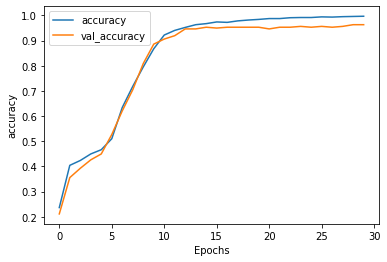

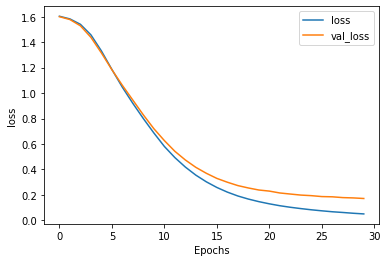

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

###Visualizing 3D Vectors
We can visualize the vectors associated with each word in the training set in a 3D space.


In [ ]:
# Reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Save the embedding layer
e = model.layers[0]

# Save the weights of the embedding layer
weights = e.get_weights()[0]
print(f"Weights of embedding layer have shape: {weights.shape}")

Weights of embedding layer have shape: (1000, 16)


Generate the vecs.tsv and meta.tsv files that we can upload to the embedding projector by visiting Tensorflow's Embedding Projector.



In [ ]:
import io

In [ ]:
# Generate files for embedding visualization
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, NUM_WORDS):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.unique(labels)

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

We can visualize the final weights of the embeddings using the Tensorflow Embedding Projector at https://projector.tensorflow.org/.